In [82]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [83]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [84]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [85]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [86]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
575459,588848899895132749,140.00962184,-0.15778122,19.201881,0.17428,4,G09_Y2_030_290,6,21.620457,20.158827,19.104753,18.518423,18.206768,0.17428,592.6005404809401,38.86381021621107,G9,0,0,-386.6374059876321,324.3166754431326,-1.3897045838965796,383.8980285026102,-327.5528588597247,-1.7746331429809525,1.0540733,19.201881,0.8639600685772892,0,6,-0.014663094259624754,0.17545017090332032,0.2130532306531508,0.5367595206251695,0.7303670437682157,0.8,-0.1690516,-0.13942401,-19.70593043569002,-19.735558027061558,-19.874982038172817,38.90781184438143,39.07686344686422,38.937439435752964,-0.05791565914441349,0.07536212516738633,0.15880921921778762,0.3405374148810496,-19.651686424254656
3897040,588010931368165667,130.31244933,-0.89151632,18.104918,0.08585,4,G09_Y2_019_020,6,19.572409,18.506824,18.077213,17.800508,17.696072,0.08585,274.8623903406085,37.19557659508922,G9,0,0,-163.74471894731764,192.9961188800888,-3.9385342257768943,162.11380910055132,-194.36471114723605,-4.101084895799624,0.4296112,18.104918,0.4445410105042873,0,3,-0.10910600457853067,-0.12403580902811587,0.08074524817794687,0.08639628039550101,0.42396017383713336,2.12,-0.083274506,-0.182002,-19.088129810989585,-18.98940232396194,-19.171404317022052,37.1930473372347,37.27632184326717,37.09431985020706,-0.11485377969255195,-0.13266404536643348,0.10187109866964916,0.1325112443472298,-19.109255661481285
601205,588848900431544435,138.90612555,0.27857838,19.362484,0.24948,4,G09_Y1_HS2_285,6,20.7944,19.821543,19.258896,19.01315,18.871838,0.24948,888.2239138152444,39.74261230792502,G9,0,0,-535.732888570551,467.2487324187023,3.4563380666456793,531.7924546586355,-471.7322255781404,2.9231207808078117,0.56264687,19.362484,0.29003288304579516,0,2,-0.1600955070168144,0.11251847578211702,0.00663762080412475,0.27710336839652366,0.2921811182523276,2.12,-0.2419956,-0.5288976,-20.144770347611516,-19.857868366973012,-20.38676595045766,39.507254325883004,39.74924992872915,39.2203523452445,-0.019840722580799386,0.2841163758293097,0.19688415578140173,0.5492916655429729,-20.335016882588793
485631,587729777982112149,216.61629277,-1.79543898,19.484274,0.131,4,G15_Y6_096_030,5,20.909975,20.018244,19.571632,19.285532,19.046059,0.131,432.8881364616763,38.18187841948124,G15,0,0,-307.0611485445811,-228.17923915149026,-11.99195529556989,308.9547657852068,225.59197877709622,-12.301744881253132,0.4466114,19.484274,0.40426383674125016,0,3,-0.09950768692835966,-0.05716011925066454,0.08404827145409753,0.14113338958776595,0.3895262862852769,2.12,-0.12707,-0.27771997,-18.65458278560563,-18.50393280589505,-18.781652780412873,38.13885669612809,38.26592669093533,37.98820671641751,-0.08213466189169369,-0.03359068063684362,0.13459021647050742,0.23158460907681966,-18.70512473062204
54098,587722982812352861,176.6190289,-0.26921075,19.623877,0.25817,4,G12_Y1_BND1_059,5,21.670341,20.445995,19.606117,19.270187,19.310995,0.25817,923.8031541918776,39.82789720374288,G12,0,0,-732.9574387231089,43.30

In [87]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

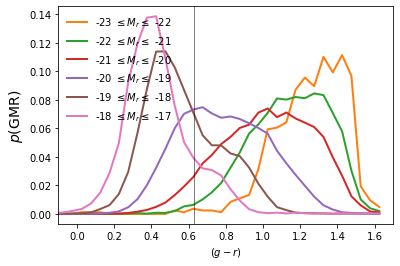

In [88]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

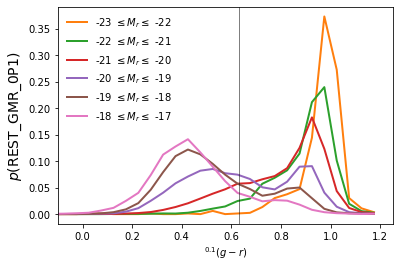

In [89]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

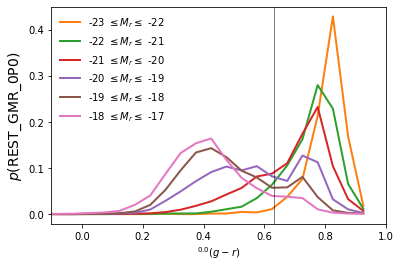

In [90]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

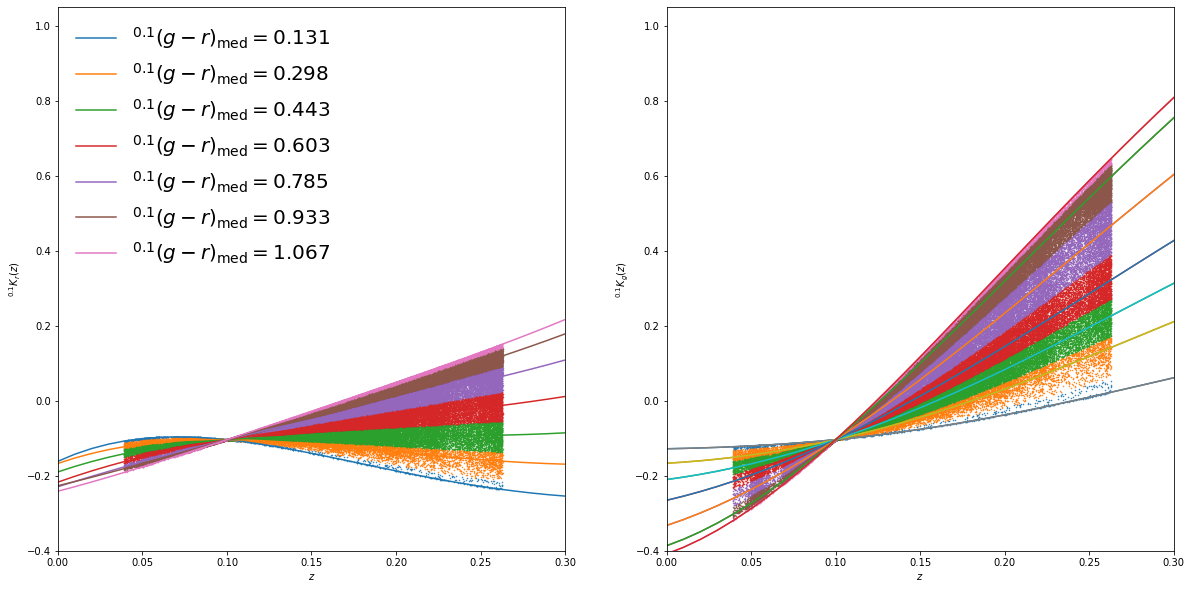

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

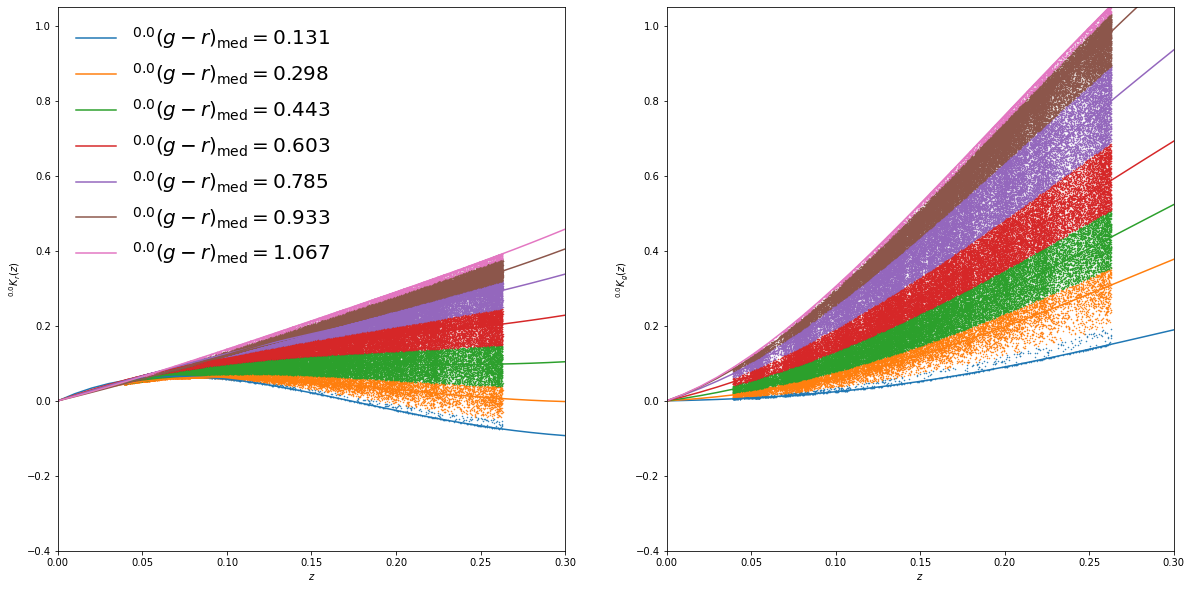

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

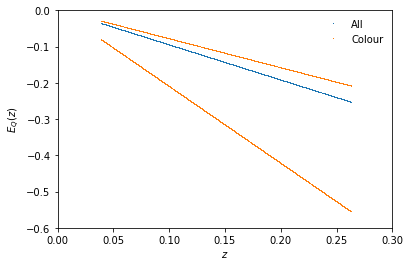

In [95]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

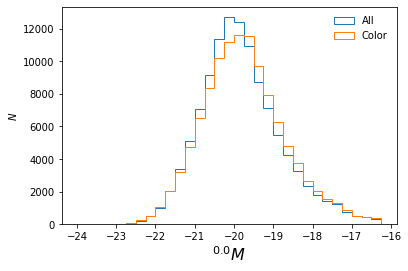

In [96]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

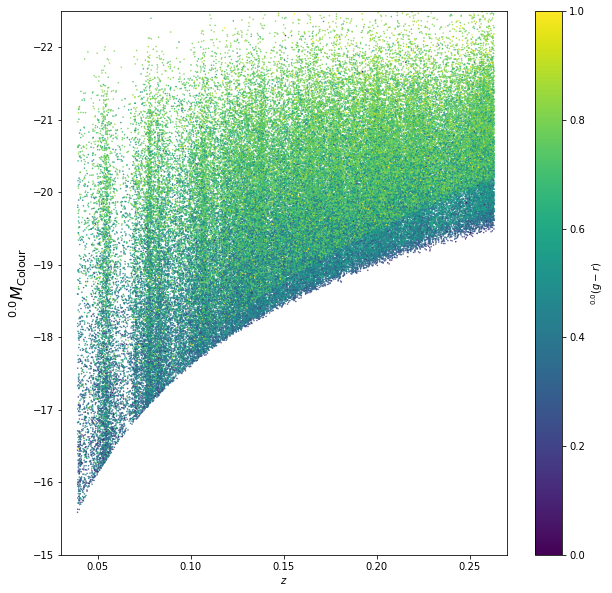

In [98]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

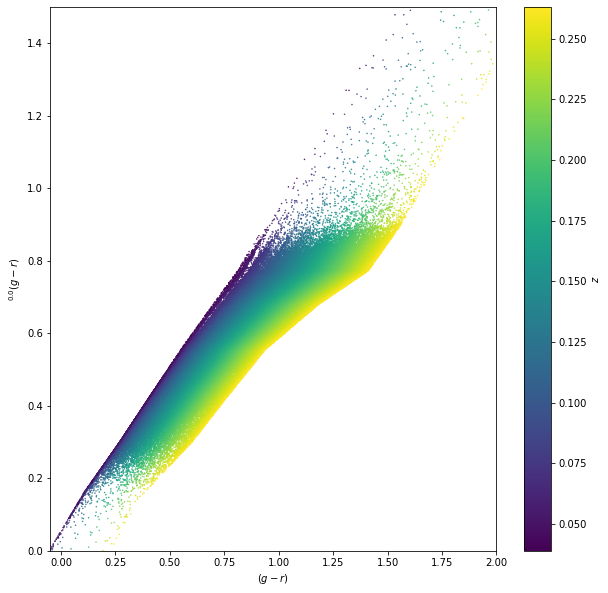

In [99]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.